In [2]:
from load_structures import load_structures
from create_structures import create_structures
import matplotlib.pyplot as plt
from find_function_max import find_function_max
from read_spectrum_curve import Spectrum
from find_intencity_sf import find_intencity_sf
import numpy as np


import warnings
warnings.filterwarnings('ignore')

In [3]:
structures_list = ['gef3', 'ghole1', 'gketoohw1', 'gketoohw12', ]
create_structures(structures_list)
structs = load_structures(structures_list)

New structures have been successfully created!
Structure(s) gef3 ghole1 gketoohw1 gketoohw12 have been successfully loaded!


# Описание структур
| Структура | Описание |
| :--- | :--- |
| gef3 | Одна кетогруппа в дефекте |
| ghole1 | Одна кетогруппа в дефекте, связанная водородной связью с гидроксильной группой |
| gketoohw1 | Две кетогруппы на краю каркаса, связанные водородными связями с гидроксильными группами |
| gketoohw12 | Две кетогруппы на краю каркаса, связанные водородными связями с гидроксильными группами. Одна из гидроксильных групп также связаня водородной связью с молекулой воды |


# Расчетные спектры

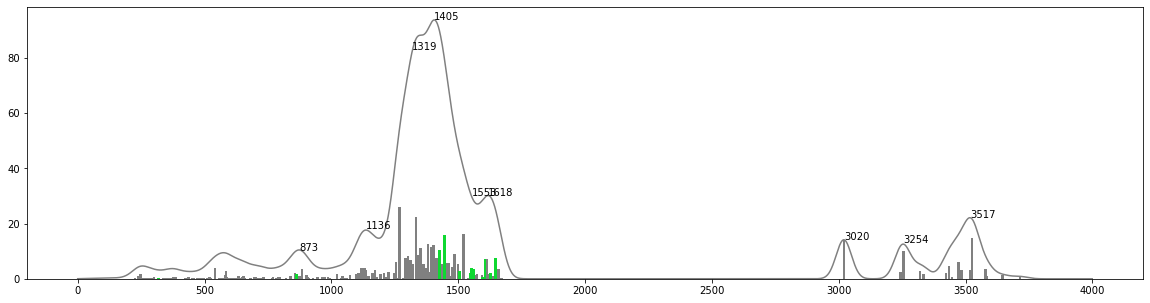

In [4]:
struct_name = 'gketoohw1'
plt.figure(figsize=(20, 5))
structs[struct_name].pm.spectrum_bar()
structs[struct_name].pm.fg_bar(['ketone'])
structs[struct_name].pm.spectrum_curve()

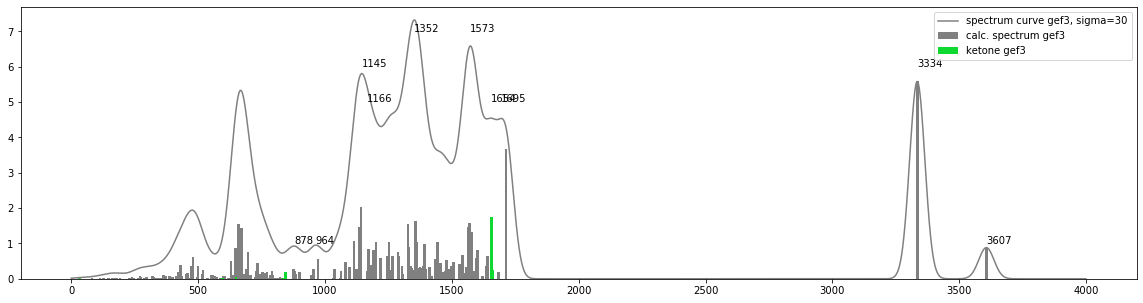

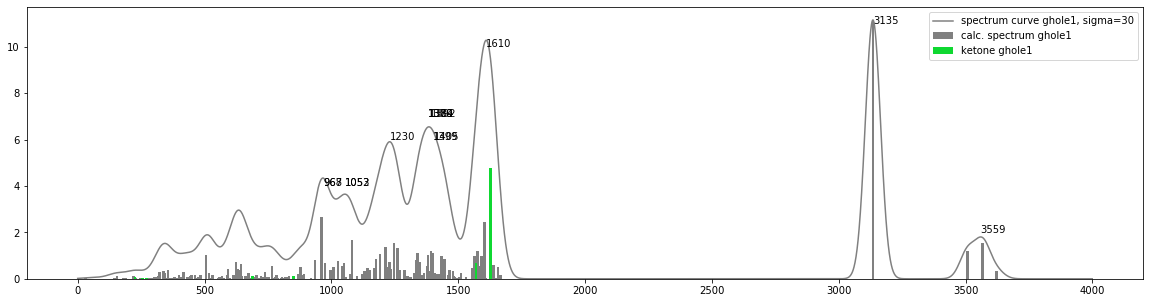

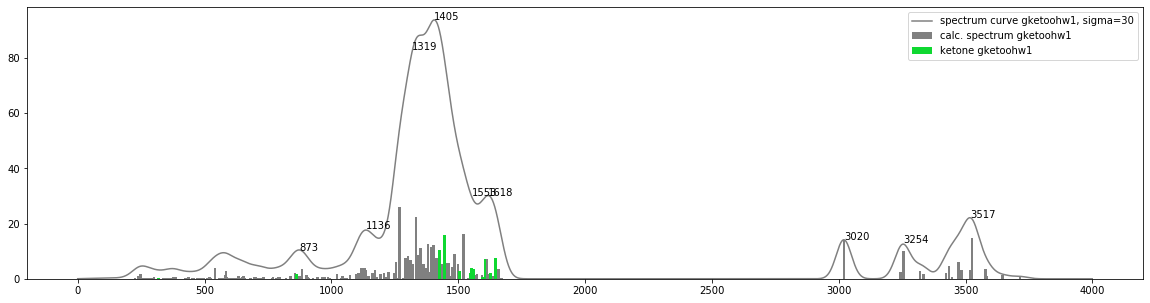

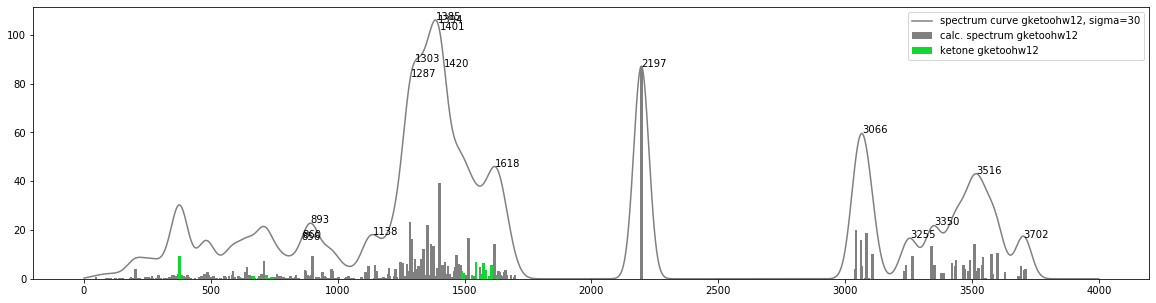

In [17]:
for struct_name in structures_list:
    plt.figure(figsize=(20, 5))
    structs[struct_name].pm.spectrum_bar()
    structs[struct_name].pm.fg_bar(['ketone'])
    structs[struct_name].pm.spectrum_curve()
    plt.legend()
    plt.show()

# Вклады кетогрупп в расчетные спектры

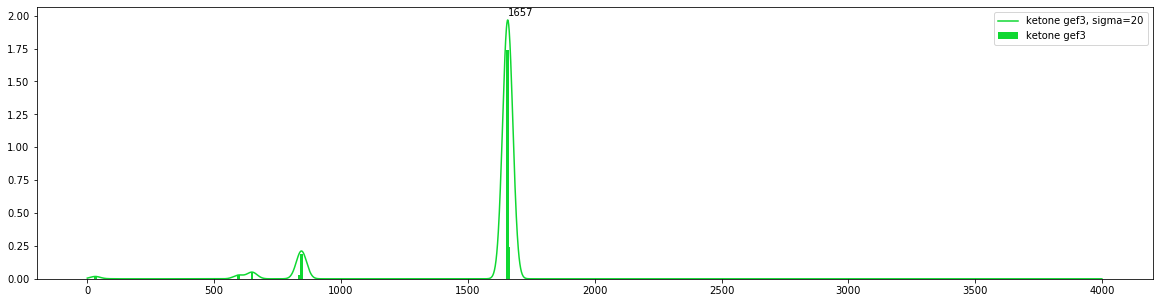

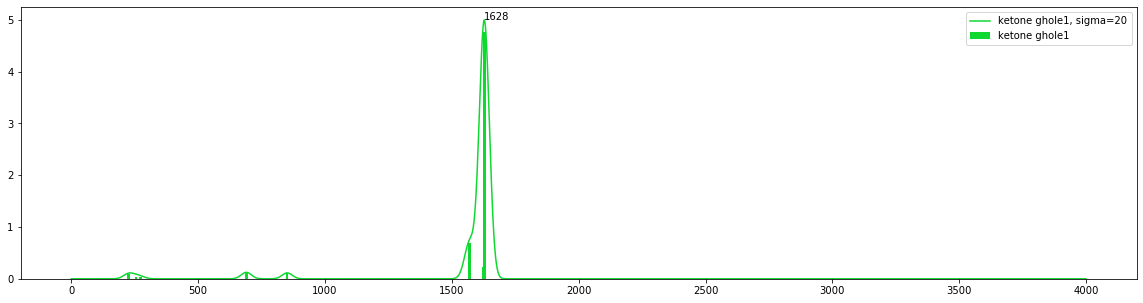

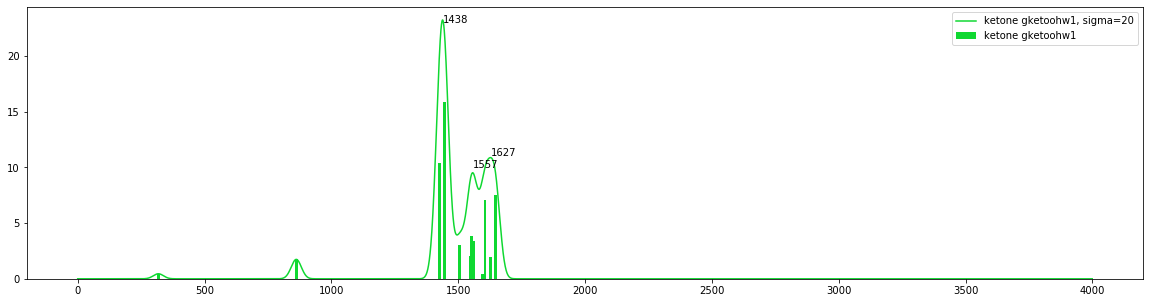

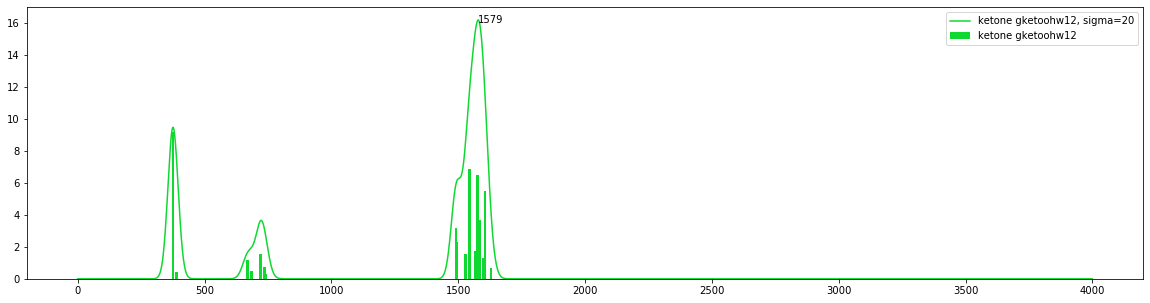

In [7]:
curves = []
for struct_name in structures_list:
    plt.figure(figsize=(20, 5))
    structs[struct_name].pm.fg_bar(['ketone'])
    curves.append(structs[struct_name].pm.fg_sum_curve(['ketone'], sigma=20))
    plt.legend()
    plt.show()

In [11]:
for struct_name in structures_list:
    print('\n\n', struct_name, 'ketone')
    print(structs[struct_name].get_report('ketone', corrected=True

SyntaxError: unexpected EOF while parsing (<ipython-input-11-bceb10b6fb96>, line 3)

In [9]:
for i, curve in enumerate(curves):
    struct_name = structures_list[i]
    print(find_function_max(
        curve[0].calculate, 
        points=structs[struct_name].get_fg_freqs('ketone', corrected=True),bounds=(900, 4000))
         )

     calc_freq  peak_position  intencity
0  1661.707402         1657.0        2.0
1  1656.519766         1657.0        2.0
     calc_freq  peak_position  intencity
0  1627.987769         1628.0        5.0
1  1625.521195         1628.0        5.0
2  1569.710065         1628.0        5.0
      calc_freq  peak_position  intencity
0   1645.880219         1627.0       11.0
1   1627.106850         1627.0       11.0
2   1605.485176         1627.0       11.0
3   1595.521000         1627.0       11.0
4   1562.124371         1557.0       10.0
5   1553.099843         1557.0       10.0
6   1547.305351         1557.0       10.0
7   1506.861368         1557.0       10.0
8   1504.737374         1557.0       10.0
9   1445.617902         1438.0       23.0
10  1425.327395         1438.0       23.0
     calc_freq  peak_position  intencity
0  1629.808336         1579.0       16.0
1  1605.034928         1579.0       16.0
2  1597.410082         1579.0       16.0
3  1584.656329         1579.0       16.0
4  1

# Проверка правильного масшатабирования на примере бензила

In [58]:
# create_structures(['benzil'])
benzil = load_structures(['benzil'])['benzil']

Structure(s) benzil have been successfully loaded!


In [1]:
plt.figure(figsize=(20, 5))
benzil.pm.spectrum_bar()
benzil.pm.fg_bar(['ketone'])
benzil.pm.spectrum_curve()
(150 * Spectrum('benzil.CSV').to_integrated_mol_absorptivity_full_spectra(number_of_points=500, width=0.01)).plot()
plt.legend()
plt.show()

NameError: name 'plt' is not defined

Structure(s) benzil have been successfully loaded!


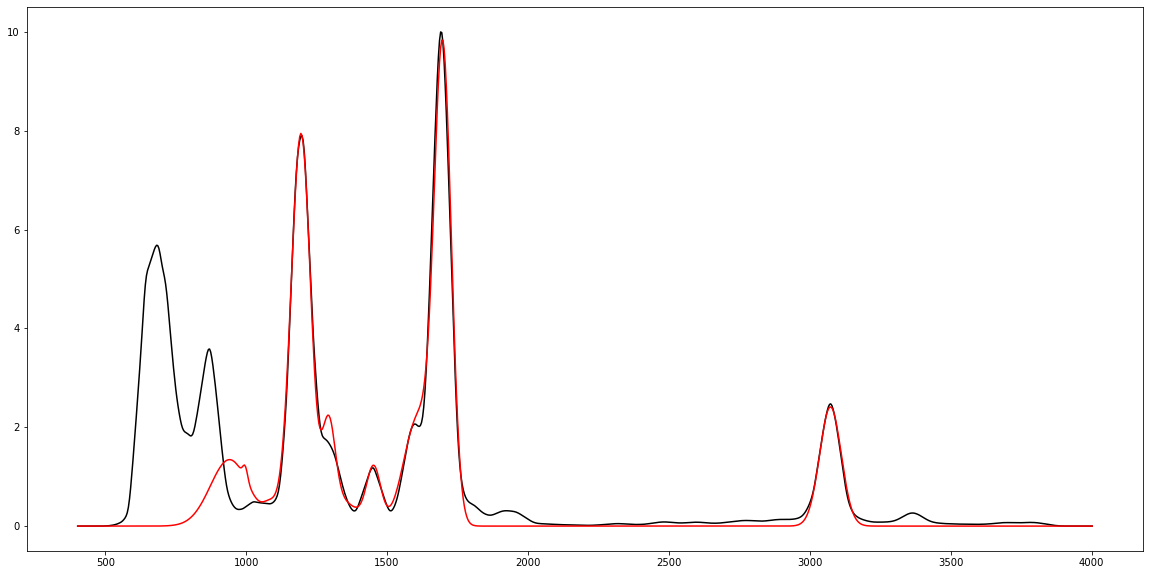

(    peak_position  intencity       psi      sigma           mu        sf
 0          3069.0       58.0  1.687129  44.882082  3073.155964  0.029088
 10         1695.0      414.0  5.203003  35.708629  1697.637004  0.012568
 12         1610.0       97.0  2.032220  59.622276  1609.873405  0.020951
 16         1494.0        2.0  0.000056  61.148376  1490.900035  0.000028
 18         1451.0       34.0  0.519891  29.549067  1452.435600  0.015291
 20         1323.0       22.0  0.673158  79.646006  1322.750137  0.030598
 24         1292.0       25.0  0.695251  26.746815  1292.781312  0.027810
 25         1203.0      208.0  3.082574  36.775028  1201.490607  0.014820
 26         1174.0      151.0  1.876272  40.008789  1176.345694  0.012426
 30         1086.0        8.0  0.146419  29.744991  1085.055095  0.018302
 32         1027.0        6.0  0.003326  23.595013  1019.981253  0.000554
 35          993.0        3.0  0.039936  10.105673   996.680189  0.013312
 41          938.0        2.0  1.67648

In [70]:
find_intencity_sf('benzil')

# Обсуждение

Как видно из спектров, приведенных выше, для структуры gef3 максимум функции Гаусса, уширяющей расчетные частоты, соответсвующие валентным колебания C=O кетогруппы, равен 1657 см-1. Эта частота согласуется с литературными данными, для соответвубщих колебаний диарил кетонов (1670 - 1660 см-1)[1]. В структуре ghole1 расчетная частота соответсвующего колебания значительно сдвинута в низкочастотную область на 29 см-1 и составляет 1628 см-1. Этот сдвиг связан с тем, что кетогруппа обладает водородной связью с гидроксильной группой напротив. В структуре gketoohw1 одна кетогруппа находятся в виде бета-дикетона, для которого характерна кето-енольная таутомерия, как показано на рисунке ниже.

<p><center><img src="images/ketoenol.bmp" style="display: inline-block;  max-height: 100%;"></center></p>
<p><center><i>Рис. 1. Кето-енольная таутомерия.</i></center></p>

Расчетные частоты для этих групп составляют 1627, 1557 и 1438 см-1. Первый максимум аналогичен максимуму в структуре ghole1. Второй максимум  отвечает колебания енольного фрагмента, сопряженного и соединенного водородной связью с кетогруппой. Эти расчеты согласуются с литератрными данными [1], где указан диапазон для колебаний енольного фрагмента в бета-дикетоне 1640 - 1535 см-1. Во второй структуре максимум, соответсвующий колебания енольного фрагмента бета-дикетона смещен в более высокочастотную область, что связано с наличием молекул воды. Молекуля воды растягивают водородную связь межно кетоном и енолом за счет образования новой водородной связи. 
Интенсивный пик 1438 см-1 в структуре gketoohw1 соотвествует колебаниям фенольных групп, которые частично затрагиваю кетогруппы, связанные с фенольными водородными связями. Ниже приведен спектр вычитания из суммы функций Гаусса для расчетных частот структуры gketoohw1 аналогичной величины для струкуктуры gketoohw12.

Таким образом, частоты валентные колебаний вдоль C=O связей кетонных функциональных групп в оксиде графита лежат в диапазоне от 1627 до 1661 см-1 в зависимости от наличия водородных связей с соседними гидроксильными группами или молекулами воды. Также на краю каркаса в оксиде графита возможно существование устойчивых бета-дикетоновых фрагментов, одна кетогруппа которого может находится в енольной форме. Частота валентных колебаний вдоль C-O связи таких фрагментов лежит в районе 1557-1579 см-1.

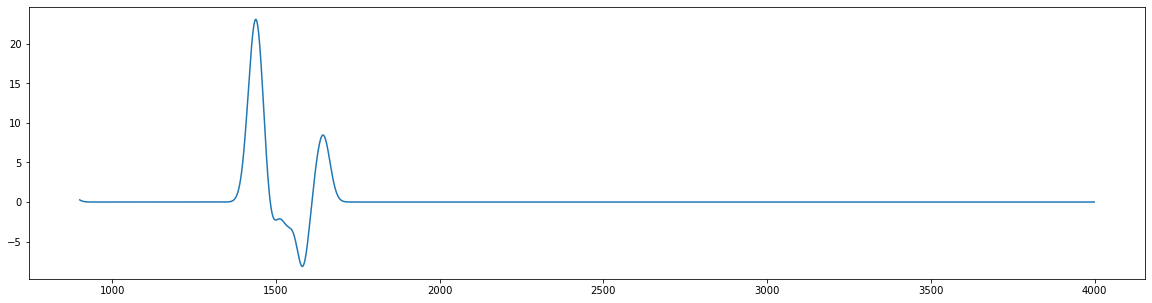

In [87]:
curve1 = structs['gketoohw1'].pm.fg_sum_curve(['ketone'], sigma=20)[0]
curve2 = structs['gketoohw12'].pm.fg_sum_curve(['ketone'], sigma=20)[0]

x = np.arange(900, 4000)
y = curve1.calculate(x) - curve2.calculate(x)
plt.close()
plt.figure(figsize=(20, 5))
plt.plot(x, y)

Из рисунка выше видно, что в струтуре gketoohw12 отсутсвует пик 1438 см-1. В структуре gketoohw12 присутсвует значительное количество молекул воды, которые как уже говорилось выше растягивают водородные связи между котогруппой и гидроксильной группй и валентные колебания фенольных гидроксилов в меньшей степени затрагивают кетогруппы.

# Список литературы:
    [1] Тарасевич Б. Н. ИК спектры основных классов органических соединений //М.: МГУ. – 2012. – Т. 6.